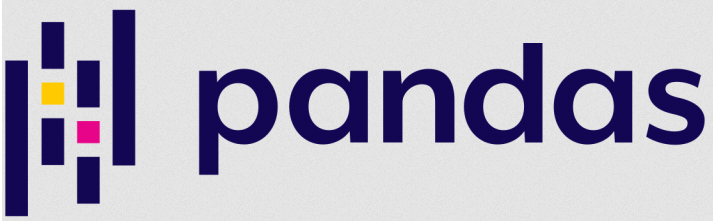

In [1]:
import pandas as pd

# Pandas, Part Two

In part one, we learned some basics:
* Import pandas
* Creating `DataFrame`s
    * From a file
    * Live from Excel
    * From Python objects (`list[list]]` and `dict[list]`)
* `DataFrame` characteristics
    * Two axes
    * Vectorised operations
    * Indexes
* Three `DataFrame` methods
    * `.head()`, `.tail()`
    * `.loc[]`, `.iloc[]`
    * `.transpose()`
* One `Series` method
    * `.unique()`

> This week's "Part two" lesson is going to introduce you to some more method names and how to use them in ways that are idiosyncratic to both Pandas and Python.

## How to _write_ dataframes to disk

In addition to being able to read tabular data from file, Pandas can also write dataframes to disk in common formats.

### DataFrame method: `.to_csv()`, `.to_excel()`, etc.

From a `DataFrame` you can write it to disk at any time using one of the `.to_...` methods. Use the `.[TAB]` approach to see what "to" methods are available to you.

Two of the most useful will likely be `.to_csv()` and `.to_excel()`.

An example:

```python
df = pd.read_excel("test_model_results_piers.xlsx", heading=1, skiprows=[2])

# Write this dataframe back as a .csv file so we don't have to wait so long reading it again
df.to_csv('pier_results.csv')
```

Just like the `pd.read_...` functions, the `.to_...` methods each have different optional settings you can include to control the output of your dataframe. A common one to use is the `index=False` option for making sure that the row index does not get saved as an extra column in your file called, "index".

```python
df.to_csv('pier_results.csv', index=False)
```

#### Note: Some additional libraries may be needed

Many of the `.to_...` methods rely on other external libraries to write the file type. For instance, `.to_excel()` relies on the library called `openpyxl`. We installed this library in Lesson 01 into your Python environment so no worries here. If you need an additional library, pandas will tell you which one you need. 

To install such a library, use `pip install <package_name>` in your Jupyterlab to install it (from the Python Packaging Index, on the internet). 

**Be sure to either copy and paste the package name or to type the name carefully to ensure you install the correct one.** These are company computers so please respect that.

# Series Methods

Often, we want to perform operations on a single column of a `DataFrame`. When we do this, we are actually operating on a `Series`. 

As such, those operations will be `Series` methods.

## Common _numerical_ `Series` methods: `.max()`, `.min()`, `.sum()`, etc...

From a Pandas `Series`, there are many common, and likely obvious, method names:

* `.max()`
* `.min()`
* `.mean()`
* `.median()`
* `.mode()`
* `.sum()`
* `.diff()` - Like doing: this_element - previous_element, but not cumulatively
* `.cumsum()` - Add each element in the series cumulatively to the element below
* `.cummax()` - The max element seen so far in the series
* `.cummin()` - The min element seen so far in the series
* `.nlargest()` - The `n` largest values in the series
* `.nsmallest()` - The `n` smallest values in the series
* ...and many more. See: https://pandas.pydata.org/pandas-docs/stable/reference/series.html

These methods return either a single resulting numerical value (e.g. `.max()`, `.mean()`, `.sum()`, etc.) or they return a `Series` filled with new numerical values (e.g. `.diff()`, `.cumsum()`, `.cummax()`, `.nlargest()`, etc.).

## Index locating `Series` methods: `.idxmax()`, `.idxmin()`

Sometimes, we don't need to know what the maximum or minimum values _is_, we just want to know where to find it.

Using `.idxmax()` and `.idxmin()` we can get the row index for either a max or min in the series.

```python
max_idx = df["P"].idxmax()
df.loc[max_idx]
```

## Series sorting methods: `.sort_values()`, `.sort_index()`

Sorting values can come in very handy. 

Note, sorting values does not "ruin" the data in the series or the dataframe that the series might be in. The data gets re-arranged but __the index values travel with the sorted values so the original positions are still known.__ All of the data in the frame is relational which means that each item in a row is understood by pandas to be "in a row" and in relation with all of the other data in the row.

```python
df["P"].sort_values()
```

## Series `.str` methods

Sometimes, you are working with string data in a column and you want to use Python string methods on the strings in the column.

Well, you can! Pandas `Series` implements a way to do this by accessing the `Series.str` interface. This means you have to write `.str` first before you write your string method name on the series.

Example:

```python
df["Pier"].str.lower()

# To make the change stick, assign the series "Pier" in the dataframe to the new series created
df["Pier"] = df["Pier"].str.lower()
```

A useful one to know is `.str.split()`. Just like in normal Python, you can split a string into the list of elements that surround the splitting sub-string (e.g. `"A-NE".split("-")`).

You can do a similar thing in a Pandas `Series`.

Example:

```python
df["Pier"].str.split("-")

# If you want the split elements to go into different columns, use expand=True
df["Pier"].str.split("-", expand=True)
```

In [29]:
df["Pier"].str.split("-", expand=True)

,0,1
0,A,NE
1,A,NE
2,A,NE
3,A,NE
4,A,NE
...,...,...
20155,B,MIDSOUTH
20156,B,MIDSOUTH
20157,B,MIDSOUTH
20158,B,MIDSOUTH
